In [1]:
#!pip install pandas numpy openpyxl matplotlib missingno seaborn missingno

In [2]:
import pandas as pd
import numpy as np
from IPython.core.pylabtools import figsize
import missingno as mno
%matplotlib inline

In [3]:
df = pd.read_excel("CCPP/Folds5x2_pp.xlsx")
df.drop_duplicates(inplace=True)
df_outliers = df.copy()
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 9527 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9527 non-null   float64
 1   V       9527 non-null   float64
 2   AP      9527 non-null   float64
 3   RH      9527 non-null   float64
 4   PE      9527 non-null   float64
dtypes: float64(5)
memory usage: 446.6 KB


,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [4]:
Q1 = df_outliers.quantile(0.25)
Q3 = df_outliers.quantile(0.75)
IQR = Q3 - Q1

print(IQR)

AT    12.180
V     24.770
AP     8.115
RH    21.475
PE    28.615
dtype: float64


In [13]:
import numpy as np

# We'll select only numeric columns for outlier capping
numeric_df = df.select_dtypes(include=[np.number]).copy()

for col in numeric_df.columns:
    Q1 = numeric_df[col].quantile(0.25)
    Q3 = numeric_df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Cap the lower side
    numeric_df.loc[numeric_df[col] < lower_bound, col] = lower_bound
    # Cap the upper side
    numeric_df.loc[numeric_df[col] > upper_bound, col] = upper_bound

# Now replace the original numeric columns in 'df' with the capped values
df[numeric_df.columns] = numeric_df


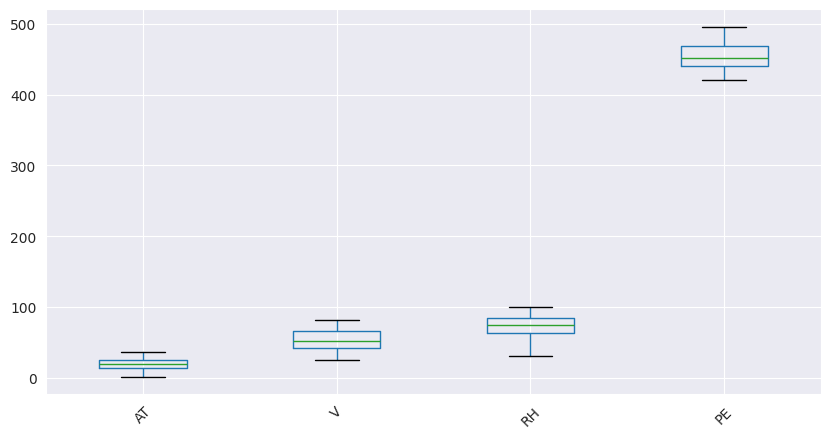

In [14]:
df.boxplot(column = ['AT', 'V', 'RH', 'PE'], rot=45, figsize = (10,5));

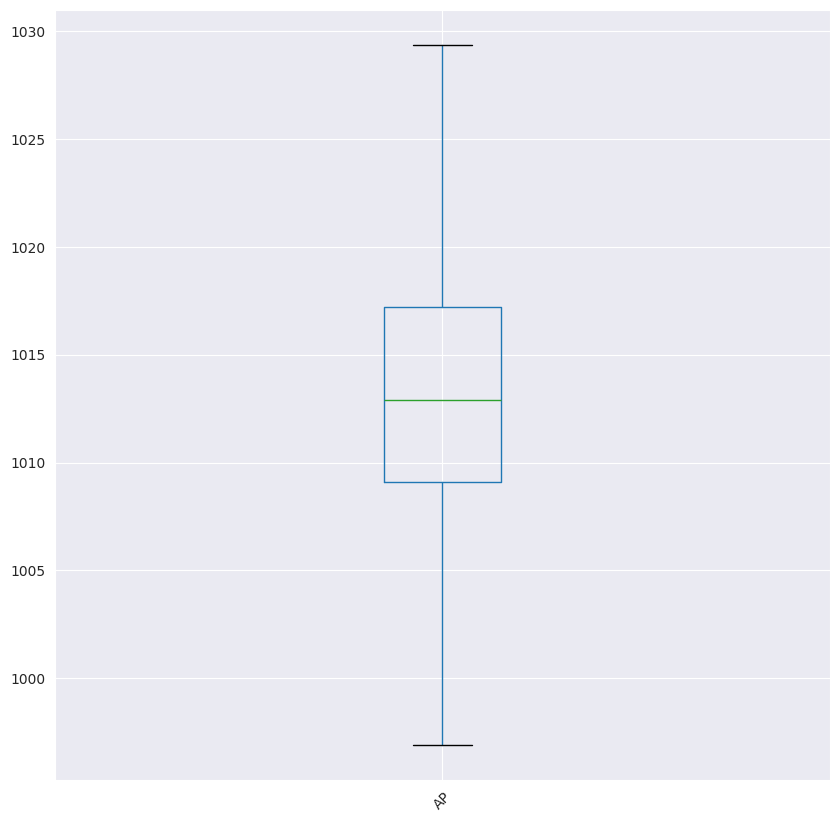

In [15]:
df.boxplot(column = ['AP'], rot=45, figsize = (10,10));

<Axes: >

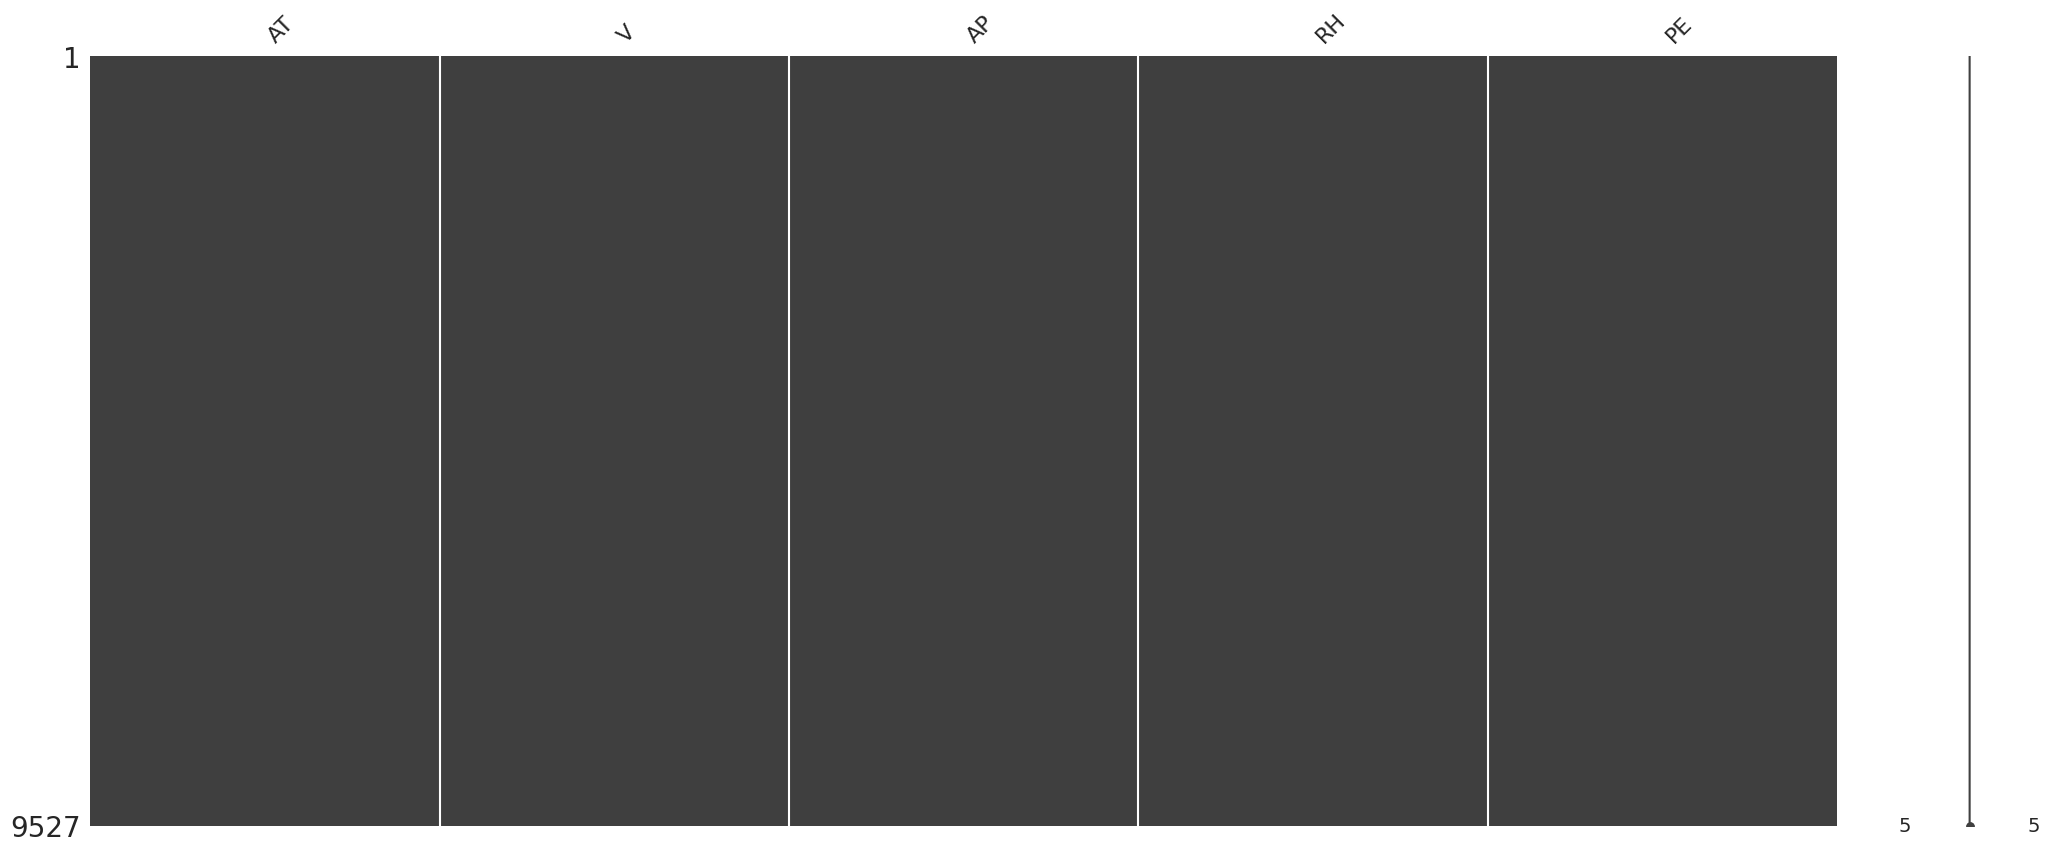

In [16]:
mno.matrix(df , figsize(10,10))

In [17]:
df.to_csv("Data.csv", index=False)

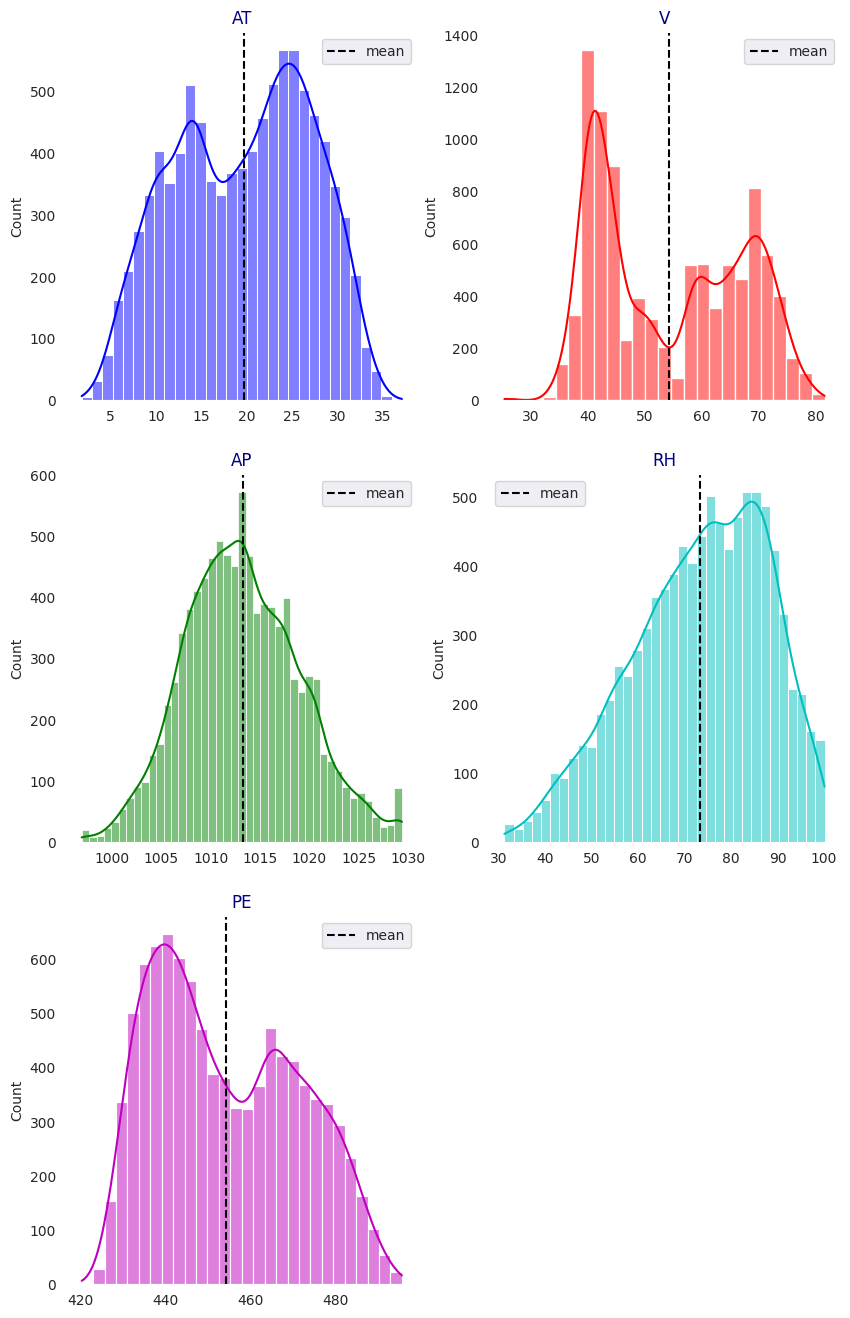

In [18]:
import itertools
import matplotlib.pyplot as plt
import seaborn as sns

cols = [i for i in df.columns if i != 'strength']
length = len(cols)
cs = ["b", "r", "g", "c", "m", "k", "lime", "c"]
fig = plt.figure(figsize=(10, 22))

for i, j, k in itertools.zip_longest(cols, range(length), cs):
    if i is None or j is None or k is None:
        continue  # skip incomplete tuples

    plt.subplot(4, 2, j + 1)
    ax = sns.histplot(df[i], color=k, kde=True)
    ax.set_facecolor("w")
    plt.axvline(df[i].mean(), linestyle="dashed", label="mean", color="k")
    plt.legend(loc="best")
    plt.title(i, color="navy")
    plt.xlabel("")


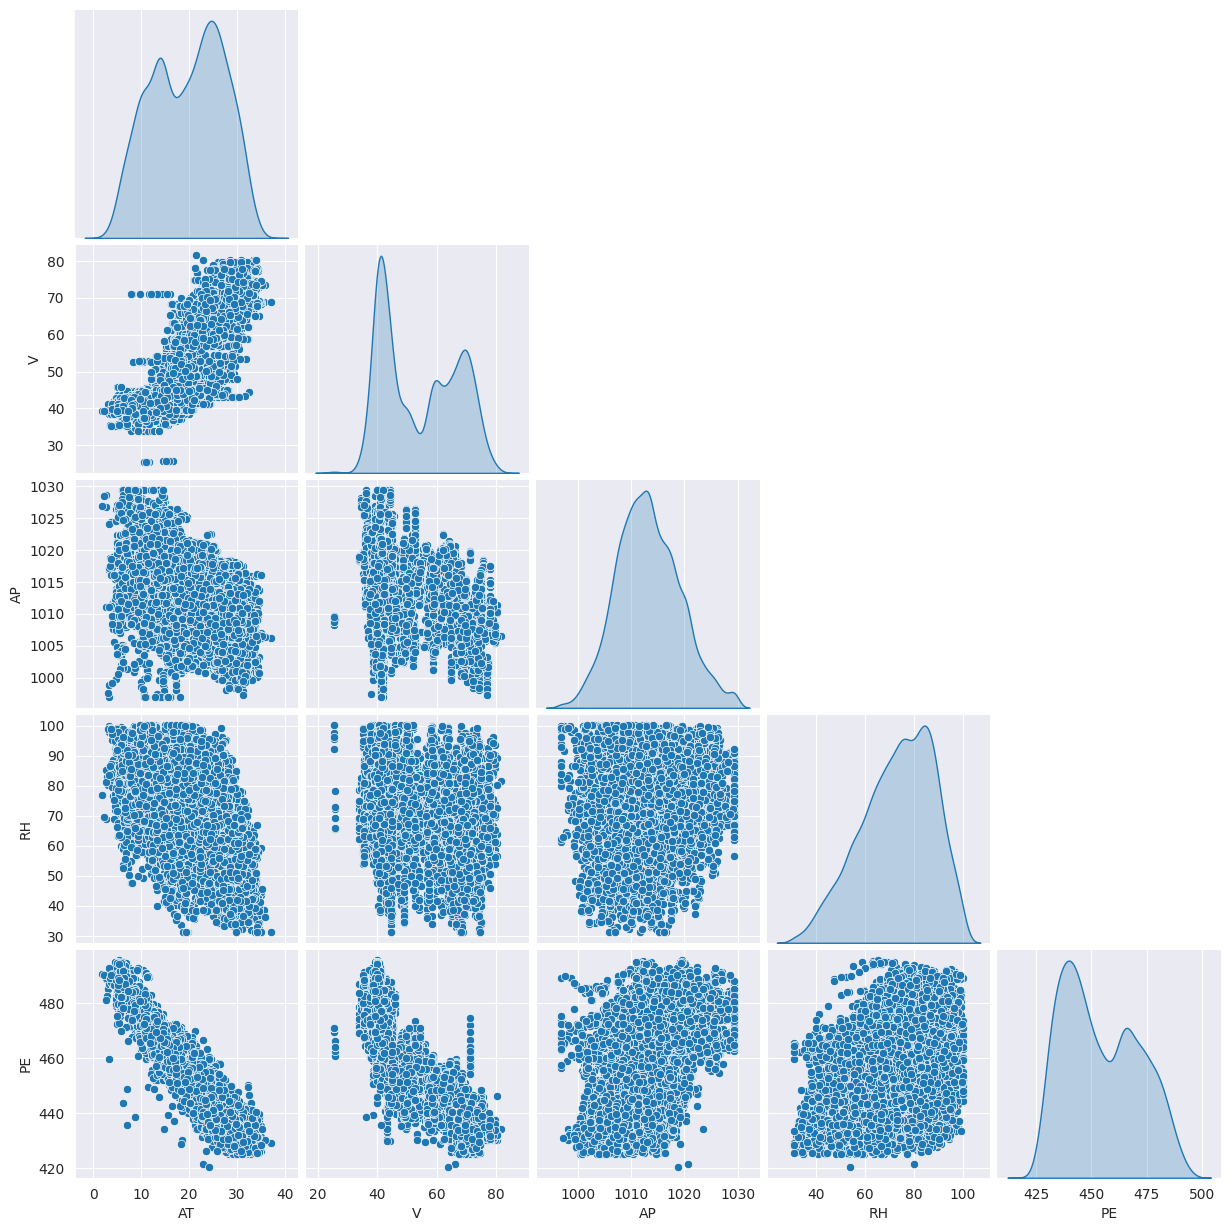

In [19]:
sns.pairplot(df, diag_kind = 'kde', corner = True);

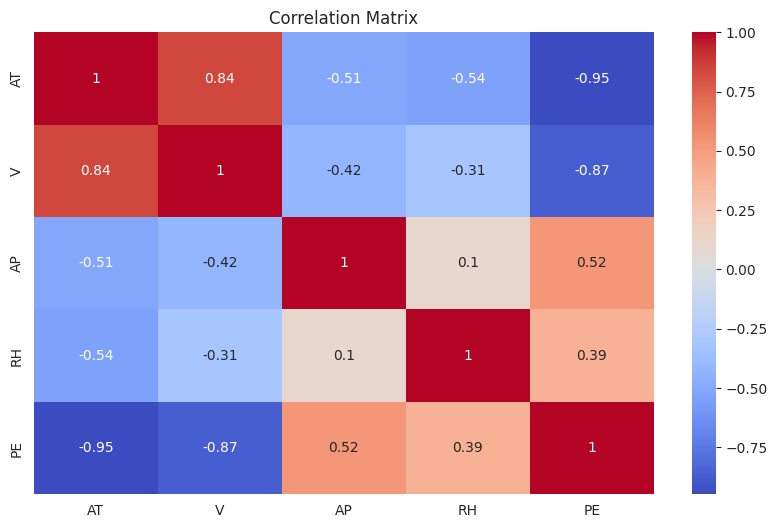

In [20]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()